In [2]:
import pandas as pd
#Leemos los CSV 
df_1 = pd.read_csv("SAT-Propiedad-BU_2017-2023.csv", sep=';', encoding='latin1', low_memory=False)
#df_2 = pd.read_csv("snic-departamentos-anual.csv", sep=',', encoding='latin1', low_memory=False)

print(df_1.columns.tolist())

#PROVINCIAS CON MAS ROBOS EN ESTABLECIMIENTOS
df_provincias_robos_est = df_1.groupby('provincia_nombre')['cantidad_hechos_lugar_establec'].sum().sort_values(ascending=False)
#print(df_provincias_robos_est)

#DEPARTAMENTOS CON MAS ROBOS EN ESTABLECIMIENTOS
df_departamentos_robos_est = df_1.groupby('departamento_nombre')['cantidad_hechos_lugar_establec'].sum().sort_values(ascending=False)
#print(df_departamentos_robos_est)





['ï»¿provincia_id', 'provincia_nombre', 'departamento_id', 'departamento_nombre', 'anio', 'mes', 'codigo_delito_sat_prop', 'nombre_delito_sat_prop', 'cantidad_hechos', 'cantidad_hechos_inc_conocido', 'cantidad_hechos_inc_desconocido', 'cantidad_hechos_lugar_via_publ', 'cantidad_hechos_lugar_establec', 'cantidad_hechos_lugar_dom_part', 'cantidad_hechos_lugar_sd', 'cantidad_hechos_arma_de_fuego', 'cantidad_hechos_arma_otra', 'cantidad_hechos_arma_sin_arma', 'cantidad_hechos_arma_sd', 'cantidad_hechos_origen_denuncia', 'cantidad_hechos_origen_intervenc', 'cantidad_hechos_origen_orden_jud', 'cantidad_hechos_origen_otro', 'cant_hechos_agrav_por_lesiones', 'cant_hechos_agrav_sin_lesiones', 'cantidad_inculpados', 'cantidad_inculpados_sexo_masc', 'cantidad_inculpados_sexo_fem', 'cantidad_inculpados_sexo_sd', 'cantidad_inculpados_edad_0_15', 'cantidad_inculpados_edad_16_17', 'cantidad_inculpados_edad_mas_18', 'cantidad_inculpados_edad_sd']


# Cantidad general de incidentes

In [3]:
import pandas as pd
#Leemos los CSV 
df_1 = pd.read_csv("SAT-Propiedad-BU_2017-2023.csv", sep=';', encoding='latin1', low_memory=False)
#df_2 = pd.read_csv("snic-departamentos-anual.csv", sep=',', encoding='latin1', low_memory=False)

print(df_1.columns.tolist())

#PROVINCIAS CON MAS ROBOS EN ESTABLECIMIENTOS
df_provincias_robos_est = df_1.groupby('provincia_nombre')['cantidad_hechos_lugar_establec'].sum().sort_values(ascending=False)
#print(df_provincias_robos_est)

#DEPARTAMENTOS CON MAS ROBOS EN ESTABLECIMIENTOS
df_departamentos_robos_est = df_1.groupby('departamento_nombre')['cantidad_hechos_lugar_establec'].sum().sort_values(ascending=False)
#print(df_departamentos_robos_est)

#DEPARTAMENTOS CON MAS ROBOS Y HURTOS
df_robos = df_1[(df_1["codigo_delito_sat_prop"] == 3) | (df_1["codigo_delito_sat_prop"] == 1)]
df_departamentos_robos = df_robos.groupby(['departamento_nombre','anio', 'mes'])['cantidad_hechos'].sum().reset_index().sort_values(by='cantidad_hechos',ascending=False)
print(df_departamentos_robos)


['ï»¿provincia_id', 'provincia_nombre', 'departamento_id', 'departamento_nombre', 'anio', 'mes', 'codigo_delito_sat_prop', 'nombre_delito_sat_prop', 'cantidad_hechos', 'cantidad_hechos_inc_conocido', 'cantidad_hechos_inc_desconocido', 'cantidad_hechos_lugar_via_publ', 'cantidad_hechos_lugar_establec', 'cantidad_hechos_lugar_dom_part', 'cantidad_hechos_lugar_sd', 'cantidad_hechos_arma_de_fuego', 'cantidad_hechos_arma_otra', 'cantidad_hechos_arma_sin_arma', 'cantidad_hechos_arma_sd', 'cantidad_hechos_origen_denuncia', 'cantidad_hechos_origen_intervenc', 'cantidad_hechos_origen_orden_jud', 'cantidad_hechos_origen_otro', 'cant_hechos_agrav_por_lesiones', 'cant_hechos_agrav_sin_lesiones', 'cantidad_inculpados', 'cantidad_inculpados_sexo_masc', 'cantidad_inculpados_sexo_fem', 'cantidad_inculpados_sexo_sd', 'cantidad_inculpados_edad_0_15', 'cantidad_inculpados_edad_16_17', 'cantidad_inculpados_edad_mas_18', 'cantidad_inculpados_edad_sd']
      departamento_nombre  anio         mes  cantidad_h

# DEPARTAMENTOS CON MAS ROBOS Y HURTOS

In [4]:

df_departamentos_robos_años = df_departamentos_robos.groupby(['anio', 'mes'])['cantidad_hechos'].sum()
print(df_departamentos_robos_años)

anio  mes       
2017  Abril         47820
      Agosto        46707
      Diciembre     45358
      Enero         49277
      Febrero       45213
                    ...  
2023  Marzo         58327
      Mayo          57188
      Noviembre     58455
      Octubre       59468
      Septiembre    57938
Name: cantidad_hechos, Length: 84, dtype: int64


# Cantidad de robos y hurtos por año y meses

C:\Users\elian\AppData\Local\Temp\ipykernel_6968\316663865.py:47: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


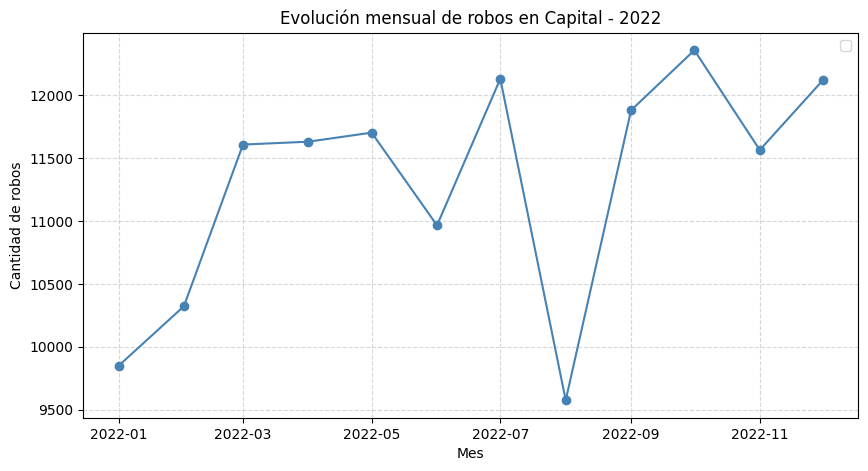

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
df_1 = pd.read_csv("SAT-Propiedad-BU_2017-2023.csv", sep=';', encoding='latin1', low_memory=False)

#ARMAMOS UNA LISTA PARA ORDENAR LOS MESES
mapa_meses = {
    "Enero": "01", "Febrero": "02", "Marzo": "03",
    "Abril": "04", "Mayo": "05", "Junio": "06",
    "Julio": "07", "Agosto": "08", "Septiembre": "09",
    "Octubre": "10", "Noviembre": "11", "Diciembre": "12"
}


#DEPARTAMENTOS CON MAS ROBOS GENERALES
df_departamentos_robos_grales = df_1.groupby(['anio', 'mes', 'departamento_nombre'])['cantidad_hechos'].sum().reset_index().sort_values(by='cantidad_hechos',ascending=False)

#CREAMOS UNA NUEVA COLUMNA PARA EL NUNMERO DE LOS MESES
df_departamentos_robos_grales["mes_num"] = df_departamentos_robos_grales["mes"].map(mapa_meses)



#CREAMOS UNA NUEVA COLUMNA CON LA FECHA COMPLETA
df_departamentos_robos_grales["fecha"] = pd.to_datetime(
    df_departamentos_robos_grales["anio"].astype(str) + "-" +
    df_departamentos_robos_grales["mes_num"].astype(str) + "-01",
    format="%Y-%m-%d"
)

anio_filtro = 2022
departamento_filtro = 'Capital'

df_filtrado = df_departamentos_robos_grales[
    (df_departamentos_robos_grales["anio"] == anio_filtro) &
    (df_departamentos_robos_grales["departamento_nombre"] == departamento_filtro)
]

df_filtrado = df_filtrado.sort_values("fecha")

#CREAMOS EL GRAFICO
fix, ax = plt.subplots(figsize=(10, 5))
ax.plot(df_filtrado['fecha'], df_filtrado['cantidad_hechos'], marker="o", color="steelblue", linestyle="-")

ax.set_title(f"Evolución mensual de robos en {departamento_filtro} - {anio_filtro}")
ax.set_xlabel("Mes")
ax.set_ylabel("Cantidad de robos")
ax.grid(True, linestyle="--", alpha=0.5)
ax.legend()    


# ROBOS / ACTOS DELICITIVOS EN DEPARTAMENTOS POR AÑOS Y MESES

In [31]:
import geopandas as gpd
import pandas as pd
import unicodedata
df = pd.read_csv("snic-departamentos-anual.csv", sep=';', encoding='utf-8', low_memory=False)

#DEPARTAMENTOS CON MAS ROBOS Y HURTOS
codigos_delitos = [15, 16, 19, 20]
df_robos_hurtos = df[df['cod_delito'].isin(codigos_delitos)]



#SUMAMOS LOS HECHOS POR DEPARTAMENTO
df_robos_hurtos_sumados = (
    df_robos_hurtos
    .groupby(['departamento_nombre','provincia_nombre','anio'], as_index=False)['cantidad_hechos']
    .sum()
    )

df_deptos_unicos = df_robos_hurtos[['departamento_nombre', 'provincia_nombre', 'departamento_id', 'provincia_id']].drop_duplicates()

df_robos_hurtos_sumados = df_robos_hurtos_sumados.merge(
    df_deptos_unicos[['departamento_nombre','provincia_nombre']].drop_duplicates(),
    on=['departamento_nombre', 'provincia_nombre'],
    how='left'
)


#Funcion para normalizar los textos y eliminar espacios, tildes y dejar todo en mayusc
def normalizar_textos(s):
    if pd.isna(s):
        return ""
    s = s.lower()
    s = "".join(
        c for c in unicodedata.normalize("NFD", s)
        if unicodedata.category(c) != "Mn"
    )
    # Quitar espacios dobles
    s = " ".join(s.split())
    return s

#Cargamos el mapa
gdf = gpd.read_file("departamentos/pxdptodatosok.shp")

#Normalizamos los departamentos y provincias del dataframe y del gdf
gdf["departamen_norm"] = gdf["departamen"].apply(normalizar_textos)
gdf['provincia_norm'] = gdf['provincia'].apply(normalizar_textos)
df_robos_hurtos_sumados["departamento_nombre"] = df_robos_hurtos_sumados['departamento_nombre'].apply(normalizar_textos)
df_robos_hurtos_sumados["provincia_nombre"] = df_robos_hurtos_sumados['provincia_nombre'].apply(normalizar_textos)

#Codigo para buscar un departamento en especifico

df_robos_hurtos_dep = (
    df_robos_hurtos_sumados
    .loc[
        (df_robos_hurtos_sumados['departamento_nombre'] == 'rosario') &
        (df_robos_hurtos_sumados['provincia_nombre'] == 'santa fe') &
        (df_robos_hurtos_sumados['anio'] == 2019),
        ['anio','provincia_nombre','cantidad_hechos']
    ]
    .drop_duplicates()
)

print(df_robos_hurtos_dep)






#Filtramos el dataframe por un año
df_robos_hurtos_sumados = df_robos_hurtos_sumados[df_robos_hurtos_sumados['anio'] == 2018]

#Mergeamos el gdf con el data frame, haciendo coincidir los departamentos con las provincias
gdf = gdf.merge(
    df_robos_hurtos_sumados, 
    left_on=['departamen_norm' ,'provincia_norm'], 
    right_on=['departamento_nombre', 'provincia_nombre'], 
    how='left')

#Cargamos los reemplazos que no se aplicaron con el merge
reemplazos = {
    "coronel felipe varela": "general felipe varela",
    "general angel v. penaloza": "angel vicente penaloza",
    "coronel de marina l. rosales": "coronel de marina leonardo rosales",
    "quemu ouemu": "quemu quemu",
    "chicalco": "chical co",
    "o' higgins": "o'higgins",
    "grl. jose de san martin": "general jose de san martin",
    "juan f. ibarra": "juan felipe ibarra",
    "1º de mayo": "1° de mayo",
    "juan f. quiroga": "general juan facundo quiroga",
    "libertador grl. san martin": "libertador general san martin",
    # Los que no tienen geometría real:
    "departamento sin determinar": None,
    "norte (general pico)": None,
    "sur (general acha)": None,
    "centro (santa rosa)": None,
    "oeste (25 de mayo)": None
}

#Reemplazamos los nulos por cantidad 0
gdf['cantidad_hechos'] = gdf['cantidad_hechos'].fillna(0)

# Aplicar reemplazos en tu df
df_robos_hurtos_sumados['departamento_nombre'] = (
    df_robos_hurtos_sumados['departamento_nombre'].replace(reemplazos)
)


# Quitar los None porque no tienen match geográfico
df_robos_hurtos_sumados = df_robos_hurtos_sumados.dropna(subset=['departamento_nombre'])




       anio provincia_nombre  cantidad_hechos
10230  2019         santa fe            30189


# Generamos un mapa con el numero de delitos por departamento

In [27]:
import folium
from folium.features import GeoJson, GeoJsonTooltip
import branca.colormap as cm
#Creamos el mapa
map = folium.Map(location=[-38.0, -63.0], zoom_start=5)
#Creamos el colormap
colormap = cm.linear.YlOrRd_09.scale(
    gdf['cantidad_hechos'].min(),
    gdf['cantidad_hechos'].max()
)
colormap.caption = 'Cantidad de delitos'

#Funcion para colorear por cantidad de hechos
def style_function(feature):
    cantidad = feature['properties'].get('cantidad_hechos', 0)
    return {
        'fillColor': colormap(cantidad),
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.7
    }

# Añadir GeoJson con tooltip
folium.GeoJson(
    gdf.__geo_interface__,
    style_function=style_function,
    tooltip=GeoJsonTooltip(
        fields=['departamen_norm', 'cantidad_hechos', 'provincia_norm'],
        aliases=['Departamento:', 'Delitos:', 'Provincia:'],
        localize=True
    )
).add_to(map)

# Añadir leyenda
colormap.add_to(map)

#Guardar mapa
map.save('mapas/mapa_delitos_argentina2017.html')